# Group Project: Crime Rate Exploration

Scientific Question:  How have crime rates changed across age groups over the last decade? 

# Explore Robbery Data

In [105]:
#import all necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Get FBI API Key
API_KEY = api_keys.fbi_api_key

# base url for getting api data
base_url = "https://api.usa.gov/crime/fbi/sapi/"
#Create a list of states in order to request data from each state
stateAbbr = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#declare the offense that we want to explore
offense = 'robbery'
#Create a list of variables that we want to explore data for. In this case male and females
variable = ['male','female']
#declare the start and end year for the time period that we want to look at
since = '2010'
until = '2019'

#create an empty dataframe
robbery_data = pd.DataFrame(columns=[])

#Create a for loop to request data for each state and for each variable for the offense that we would like to look at.
for i in stateAbbr:
    for j in variable:
        desired_endpoint = "api/arrest/states/" + i + '/' + offense + '/' + j + '/' + since + '/' + until
        req = requests.get(base_url + desired_endpoint+'?api_key='+API_KEY).json()
        new = pd.DataFrame(req["data"])
        #Create new columns in the dataframe so that we know what data corresponds to each state and variable.
        new['State'] = i
        new['variable'] = j
        #Append the data from each request to the dataframe
        robbery_data = robbery_data.append(new)



In [107]:
robbery_data.head()

,value,data_year,month_num,key,State,variable
0,0,2010,0,10-12,AL,male
1,0,2011,0,10-12,AL,male
2,0,2012,0,10-12,AL,male
3,0,2013,0,10-12,AL,male
4,0,2014,0,10-12,AL,male


# Explore Robberies by Age Group for Entire US

In [146]:
# Explore Robberies by age group. 

Robberies_by_age = robbery_data.groupby("key")
#Robberies_by_age['value'].head()
total_robberies_per_age_group = Robberies_by_age['value'].sum()
#total_robberies_per_age_group.head()

summary_crimes_per_age = {"Total Robberies": total_robberies_per_age_group}
summarycrimes_per_age_df = pd.DataFrame(summary_crimes_per_age)
summarycrimes_per_age_df.index.name = 'Age Group'
summarycrimes_per_age_df.head()


,Total Robberies
Age Group,
10-12,4062
13-14,27724
15,33727
16,45594
17,52597


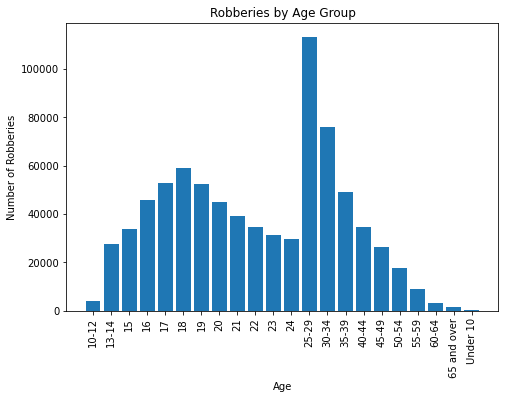

In [168]:
#Make a bar chart showing crimes per age group
#plot = summarycrimes_per_age_df.plot(kind='bar')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=summarycrimes_per_age_df.index
y=summarycrimes_per_age_df['Total Robberies']
ax.bar(x,y)
ax.set_title('Robberies by Age Group')
ax.set_ylabel("Number of Robberies")
ax.set_xlabel("Age")
plt.xticks(rotation=90)
plt.show()


# Explore Robberies By State

In [166]:
Robberies_by_state = robbery_data.groupby("State")
total_robberies_per_state = Robberies_by_state['value'].sum()
#total_robberies_per_age_group.head()

summary_crimes_per_state = {"Total Robberies": total_robberies_per_state}
summarycrimes_per_state_df = pd.DataFrame(summary_crimes_per_state)
summarycrimes_per_state_df.index.name = 'State'
summarycrimes_per_state_df.head()

,Total Robberies
State,
AK,2667
AL,5389
AR,5747
AZ,17823
CA,165015


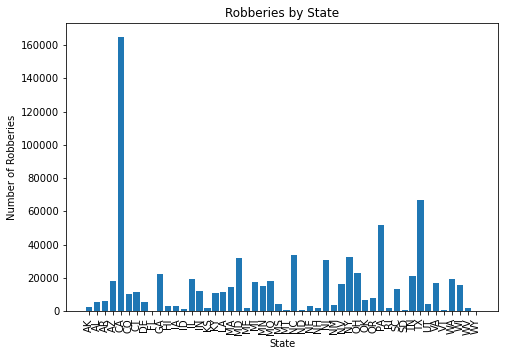

In [169]:
#Make a bar chart showing crimes per age group
#plot = summarycrimes_per_age_df.plot(kind='bar')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x=summarycrimes_per_state_df.index
y=summarycrimes_per_state_df['Total Robberies']
ax.bar(x,y)
ax.set_title('Robberies by State')
ax.set_ylabel("Number of Robberies")
ax.set_xlabel("State")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#normalize number of robberies by population
